# NVCL_KIT Scatter Plot Demonstration

*Acknowledgment: Borehole dataset courtesy of South Australia Department for Energy
and Mining. (https://energymining.sa.gov.au/minerals)*

In [1]:
from nvcl_kit.reader import NVCLReader 

In [2]:
from types import SimpleNamespace

In [3]:
param = SimpleNamespace()

Set the URL for the WFS service

In [4]:
param.WFS_URL = "https://sarigdata.pir.sa.gov.au/geoserver/ows"

Set the URL for the NVCL service

In [5]:
param.NVCL_URL = "https://sarigdata.pir.sa.gov.au/nvcl/NVCLDataServices"

In [6]:
param.MAX_BOREHOLES = 20

Initialise reader object and check for errors

In [7]:
reader = NVCLReader(param)
if not reader.wfs:
        print("ERROR!")


Get borehole information from WFS service

In [8]:
bh_list = reader.get_boreholes_list()

In [9]:
print(bh_list[0])

{'nvcl_id': '10133', 'x': 135.3493952, 'y': -27.43947232, 'href': 'https://sarigdata.pir.sa.gov.au/nvcl/resource/feature/PIRSA/borehole/10133', 'name': 'OODNADATTA 1', 'description': 'petroleum borehole, stratigraphic borehole', 'purpose': 'petroleum exploration, lithostratigraphy determination', 'status': 'single completion', 'drillingMethod': 'diamond core, rotary hammer drilling', 'operator': 'SANTOS LIMITED', 'driller': '', 'drillStartDate': '', 'drillEndDate': '1957-08-19', 'startPoint': 'natural ground surface', 'inclinationType': 'vertical', 'boreholeMaterialCustodian': 'South Australia Drill Core Reference Library', 'boreholeLength_m': '405.99', 'elevation_m': '131.064', 'elevation_srs': 'http://www.opengis.net/def/crs/EPSG/0/5711', 'positionalAccuracy': 'unknown', 'source': 'https://minerals.sarig.sa.gov.au/Details.aspx?DRILLHOLE_NO=10133', 'parentBorehole_uri': '', 'metadata_uri': 'https://catalog.sarig.sa.gov.au/geonetwork/srv/eng/catalog.search#/metadata/03b3f51f-4118-4007-

Get list of NVCL ids from NVCL service

In [10]:
nvcl_id_list = reader.get_nvcl_id_list()

Get image log data for the first NVCL id in the list

In [11]:
imagelog_data_list = reader.get_imagelog_data(nvcl_id_list[0])

Assemble data for the scatter plot

In [12]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Loop over first 10 entries in list
for ild in imagelog_data_list[:10]:
    
    # Log name has 2 parts:
    # 1. Min1,2,3 = 1st, 2nd, 3rd most common mineral
    #    OR Grp1,2,3 = 1st, 2nd, 3rd most common group of minerals
    # 2. uTSAV = visible light, uTSAS = shortwave IR, uTSAT = thermal IR
    #
    # These combine to give us a class name such as 'Grp1 uTSAS'
    #
    # Here we extract data for log type '1' and log name 'Grp1 uTSAS'
    if ild.log_type == '1' and ild.log_name == 'Grp1 uTSAS':
        
        # Read top 5 mineral entries, at a 20 depth metre spacing for 'Grp1 uTSAS'
        bh_data = reader.get_borehole_data(ild.log_id, 20, 'Grp1 uTSAS', top_n=5)
        
        # Initialise empty lists & sets to hold our x-values, y-values, colour and legend entries
        x, y, colours, legend_set = ([], [], [], set())
        
        # Loop over data at each depth
        for depth in bh_data:
            
            # Loop over all the minerals
            for elem in bh_data[depth]:
                # Only print data for the first 20m
                if depth < 20:
                    print("At ", depth, " class, count, mineral, colour is", elem.className,
                          elem.classCount, elem.classText, elem.colour)
                
                # Gather up xs, ys, colours and legend entries
                x.append(depth)
                y.append(elem.classCount)
                colours.append(elem.colour)
                legend_set.add((elem.colour, elem.classText))
        
        # Exit once we have collected one dataset 
        break



At  10.0  class, count, mineral, colour is Grp1 uTSAS 1081 SMECTITE (0.7686274509803922, 0.6627450980392157, 0.592156862745098, 1.0)
At  10.0  class, count, mineral, colour is Grp1 uTSAS 109 WHITE-MICA (1.0, 1.0, 0.0, 1.0)
At  10.0  class, count, mineral, colour is Grp1 uTSAS 46 SULPHATE (0.40784313725490196, 0.3764705882352941, 0.10980392156862745, 1.0)
At  10.0  class, count, mineral, colour is Grp1 uTSAS 16 OTHER-ALOH (1.0, 0.984313725490196, 0.7411764705882353, 1.0)
At  10.0  class, count, mineral, colour is Grp1 uTSAS 3 CARBONATE (0.0, 0.0, 1.0, 1.0)


Display the scatter graph

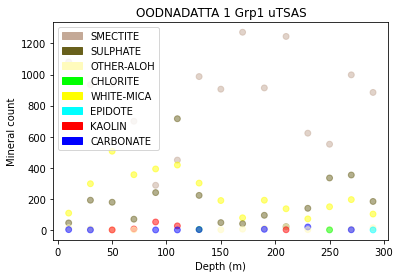

In [13]:
# Create entries for the legend
legend_list = [mpatches.Patch(color=colour, label=mineral_name) for colour, mineral_name in list(legend_set)]

# Create graph
plt.title(bh_list[0]['name']+' Grp1 uTSAS')
plt.legend(handles=legend_list)
plt.ylabel('Mineral count')
plt.xlabel('Depth (m)')
plt.scatter(x, y, s=35, c=colours, alpha=0.5)
plt.show()